In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')

In [ ]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

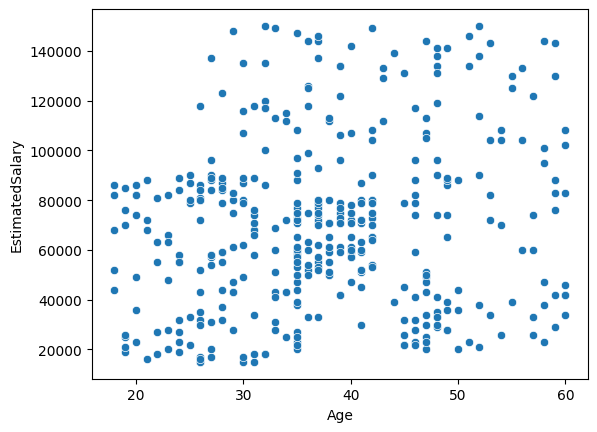

In [ ]:
import seaborn as sns
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1])

In [ ]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(128 ,activation="relu" ,input_dim=2))
model.add(Dense(1, activation="sigmoid"))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3809 - loss: 3622.1440 - val_accuracy: 0.6000 - val_loss: 72.0256
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6352 - loss: 452.2146 - val_accuracy: 0.6000 - val_loss: 579.9905
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5421 - loss: 239.7655 - val_accuracy: 0.6000 - val_loss: 120.4966
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6017 - loss: 84.4509 - val_accuracy: 0.4000 - val_loss: 16.4214
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4634 - loss: 32.2407 - val_accuracy: 0.6000 - val_loss: 112.6896
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5364 - loss: 64.7157 - val_accuracy: 0.6000 - val_loss: 40.7889
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5906 - loss: 50.5131 - val_accuracy: 0.6000 - val_loss: 106.1557
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5185 - loss: 89.6414

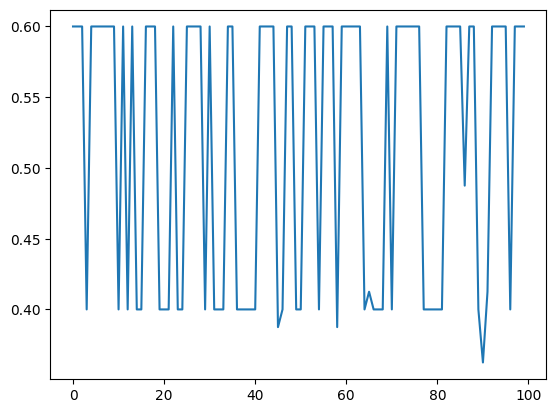

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["val_accuracy"])

Applying Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.80330081, -1.19121795],
       [ 0.75697997, -1.36859801],
       [ 0.85449752,  1.43991958],
       [-0.51074816, -1.48685138],
       [-1.48592365,  0.37563923],
       [-1.19337101,  0.55301929],
       [ 1.04953262, -1.04340124],
       [-0.21819552, -0.30431766],
       [ 0.95201507, -1.33903467],
       [-1.09585346, -1.07296458],
       [-0.51074816,  1.97205975],
       [ 2.21974321, -1.0138379 ],
       [ 1.43960282, -1.39816136],
       [ 0.07435713, -0.39300769],
       [-1.19337101,  0.64170932],
       [ 2.02470811, -0.89558452],
       [ 1.14705017,  0.58258263],
       [-0.02316042,  0.2869492 ],
       [-0.21819552,  0.25738586],
       [-0.31571307, -0.74776781],
       [-1.68095875, -0.57038775],
       [ 0.85449752,  0.58258263],
       [-0.60826571, -1.0138379 ],
       [ 0.95201507, -1.13209127],
       [-0.21819552, -0.54082441],
       [ 0.17187468,  0.81908937],
       [-0.41323061,  1.32166621],
       [ 1.14705017,  0.52345594],
       [ 0.75697997,

<Axes: >

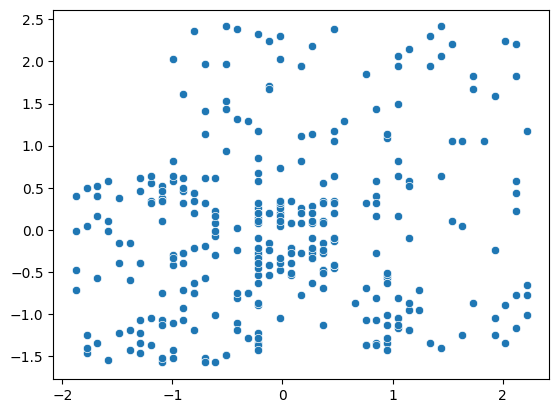

In [ ]:
sns.scatterplot(x=X_train_scaled[:,0],y=X_train_scaled[:,1])

In [ ]:
model = Sequential()

model.add(Dense(128 ,activation="relu" ,input_dim=2))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer="Adam", metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train , validation_data=(X_test_scaled , y_test), epochs=100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5955 - loss: 0.6794 - val_accuracy: 0.7875 - val_loss: 0.6382
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7768 - loss: 0.6302 - val_accuracy: 0.7875 - val_loss: 0.5921
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8285 - loss: 0.5841 - val_accuracy: 0.8000 - val_loss: 0.5549
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8573 - loss: 0.5315 - val_accuracy: 0.8000 - val_loss: 0.5252
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8337 - loss: 0.5174 - val_accuracy: 0.8125 - val_loss: 0.5001
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8601 - loss: 0.4805 - val_accuracy: 0.8250 - val_loss: 0.4781
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8352 - loss: 0.4625 - val_accuracy: 0.8375 - val_loss: 0.4579
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8837 - loss: 0.4191 - val_accuracy: 0.8375 - val_loss: 0.

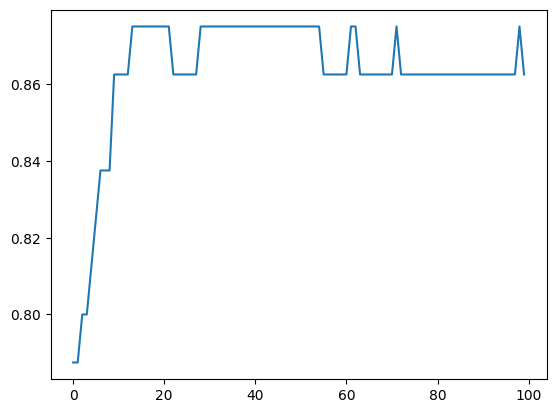

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["val_accuracy"])